In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

path = 'C:/Users/cfcoo/OneDrive - Ulster University/Ciaran/medium/figures'

dataset = np.random.default_rng().uniform(60,95,(20,4))
df = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df.head()

,data1,data2,data3,data4
0,65.189308,81.289232,73.275888,89.532440
1,89.032591,69.507617,89.441062,81.082304
2,67.767442,85.001028,73.841586,80.860923
3,76.786531,93.286243,67.669334,69.812564
4,84.959977,62.505008,89.605520,79.611859


In [4]:
# setup dataframe with formatted data:
y_data = []
for column in df.keys():
    y_data.append(df[column].values)
    
flatten = lambda fl: [item for sublist in fl for item in sublist]  

y_data = flatten(y_data)
df_A = pd.DataFrame(y_data, columns=["Accuracy"])

In [3]:
df_A.tail()

,Accuracy
75,70.408262
76,79.647162
77,86.694650
78,65.061525
79,87.225762


In [5]:
def get_category_names(df, *args):
    """
    Convert column headings into list to be used as a categorical column.
    Example df input:
    Accuracy
       50
       52
       89
    Example *args input: 'Session 1', 'Session 2', 'Session 3' -- currently requires equal number of values per x_label

    returns: (list) ['Session 1','Session 2','Session 3']
    """
    arr = []
    for arg in args:
        arr.append([arg for n in range(int(len(df.index.values) / len(args)))])
    return [i for n in arr for i in n]

In [5]:
df_A["Category"] = get_category_names(df_A, *df.columns.values) #x-axis data
df_A.tail()

,Accuracy,Category
75,70.408262,data4
76,79.647162,data4
77,86.694650,data4
78,65.061525,data4
79,87.225762,data4


In [6]:
df_A["Category"] = get_category_names(df_A, *['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experimnet 4'])
df_A.head()

,Accuracy,Category
0,62.912742,Experiment 1
1,72.648136,Experiment 1
2,64.498678,Experiment 1
3,84.493119,Experiment 1
4,87.764244,Experiment 1


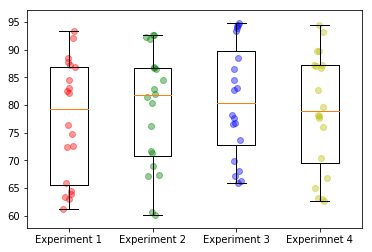

In [7]:
group = 'Category'  # x-axis
column = 'Accuracy'  # y-axis
grouped = df_A.groupby(group, sort=False)

names, vals, xs = [], [], []

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i + 1, 0.04, subdf.shape[0]))  # adds jitter to the data points - can be adjusted

plt.boxplot(vals, labels=names)  
ngroup = len(vals)

palette = ['r', 'g', 'b', 'y'] 

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.show()

In [8]:
##### Set style options here #####
sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"

boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')  # colors median line

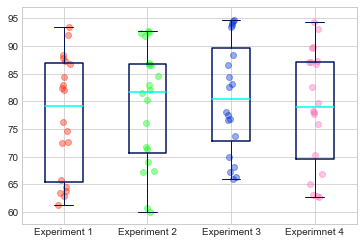

In [9]:
plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, flierprops=flierprops, medianprops=medianprops,
            showmeans=False)  # notch=True adds median notch
ngroup = len(vals)

palette = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5']

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
    
# plt.xlabel("Categorical", fontweight='normal', fontsize=14)
# plt.ylabel("Numerical", fontweight='normal', fontsize=14)

#sns.despine(bottom=True) # removes right and top axis lines
#plt.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value')
#plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)

#plt.text(2.5, 81, 'high \nmedian', ha='center', va='center', rotation='horizontal', fontsize=10)

plt.show()

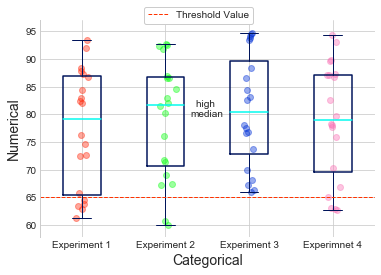

In [10]:
plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, flierprops=flierprops, medianprops=medianprops,
            showmeans=False)  # notch=True adds median notch
ngroup = len(vals)

palette = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5']

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
    
plt.xlabel("Categorical", fontweight='normal', fontsize=14)
plt.ylabel("Numerical", fontweight='normal', fontsize=14)

sns.despine(bottom=True) # removes right and top axis lines
plt.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value')
plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)

plt.text(2.5, 81, 'high \nmedian', ha='center', va='center', rotation='horizontal', fontsize=10)

plt.show()

In [2]:
"""
Part 2 - creating multiple scattered boxplots concurrently
"""
dataset = np.random.default_rng().uniform(60,95,(20,4))
df = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df.head()

dataset = np.random.default_rng().uniform(50,86,(20,4))
df_1 = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df_1.head()

,data1,data2,data3,data4
0,64.235733,54.885650,70.452019,79.121073
1,70.052917,73.063776,78.192614,66.699140
2,70.176276,51.056252,63.402041,71.045800
3,51.203560,64.874721,71.980853,74.946042
4,83.164970,56.069890,65.320748,65.980157


In [6]:
y_dataA, y_dataB = [], []
for column in df.keys():
    y_dataA.append(df[column].values)
    y_dataB.append(df_1[column].values)

y_dataA = flatten(y_dataA)
y_dataB = flatten(y_dataB)
df_A = pd.DataFrame(y_dataA, columns=["Accuracy"]) #y-axis data
df_B = pd.DataFrame(y_dataB, columns=["Accuracy"])

df_A["Category"] = get_category_names(df_A, *['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experimnet 4'])
df_B["Category"] = get_category_names(df_B, *['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experimnet 4'])

df_B.head()

,Accuracy,Category
0,64.235733,Experiment 1
1,70.052917,Experiment 1
2,70.176276,Experiment 1
3,51.203560,Experiment 1
4,83.164970,Experiment 1


In [7]:
group = 'Category'  # x-axis
column = 'Accuracy'  # y-axis
groupedA = df_A.groupby(group, sort=False)
groupedB = df_B.groupby(group, sort=False)

namesA, valsA, xsA = [], [], []
namesB, valsB, xsB = [], [], []

for i, (name, subdf) in enumerate(groupedA):
    namesA.append(name)
    valsA.append(subdf[column].tolist())
    xsA.append(np.random.normal(i + 1, 0.04, subdf.shape[0]))  # adds jitter to the data points - can be adjusted

for i, (name, subdf) in enumerate(groupedB):
    namesB.append(name)
    valsB.append(subdf[column].tolist())
    xsB.append(np.random.normal(i + 1, 0.04, subdf.shape[0]))  # adds jitter to the data points - can be adjusted

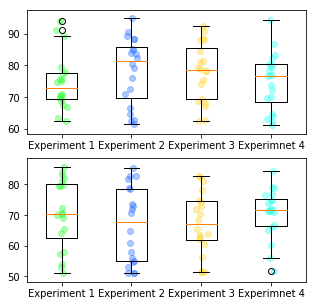

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, showmeans=False)  

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, showmeans=False) 

palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']

for xA, xB, valA, valB, c in zip(xsA, xsB, valsA, valsB, palette):
    ax1.scatter(xA, valA, alpha=0.4, color=c)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

In [11]:
boxpropsA = dict(linestyle='-', linewidth=1, color='#33B3FF')
flierpropsA = dict(marker='o', markersize=10,
                  linestyle='none', markeredgecolor='g')
whiskerpropsA = dict(color='#33B3FF')
cappropsA = dict(color='#33B3FF')
medianpropsA = dict(linewidth=1, linestyle='-', color='#33B3FF')  # colors median line

boxpropsB = dict(linestyle='-', linewidth=1, color='#FF4533')
flierpropsB = dict(marker='o', markersize=10, linestyle='none', markeredgecolor='g')
whiskerpropsB = dict(color='#FF4533')
cappropsB = dict(color='#FF4533')
medianpropsB = dict(linewidth=1, linestyle='-', color='#FF4533')  # colors median line

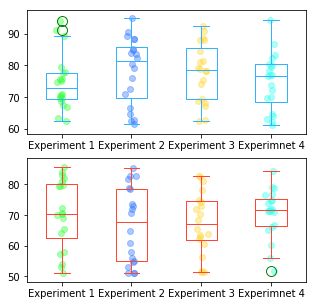

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, boxprops=boxpropsA, whiskerprops=whiskerpropsA,
            capprops=cappropsA, flierprops=flierpropsA, medianprops=medianpropsA,
            showmeans=False)  # notch=True adds median notch

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, boxprops=boxpropsB, whiskerprops=whiskerpropsB,
            capprops=cappropsB, flierprops=flierpropsB, medianprops=medianpropsB,
            showmeans=False)  # notch=True adds median notch


palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']

for xA, xB, valA, valB, c in zip(xsA, xsB, valsA, valsB, palette):
    ax1.scatter(xA, valA, alpha=0.4, color=c)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

Text(0.04,0.5,'Classification accuracy (%)')

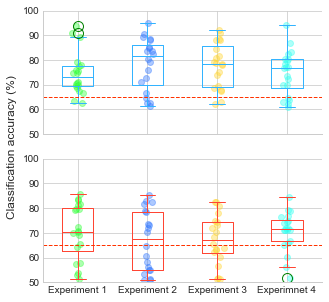

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, boxprops=boxpropsA, whiskerprops=whiskerpropsA,
            capprops=cappropsA, flierprops=flierpropsA, medianprops=medianpropsA,
            showmeans=False)  # notch=True adds median notch

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, boxprops=boxpropsB, whiskerprops=whiskerpropsB,
            capprops=cappropsB, flierprops=flierpropsB, medianprops=medianpropsB,
            showmeans=False)  # notch=True adds median notch


palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']
labels = [1,2,3,4,5,6]
for xA, xB, valA, valB, c, label in zip(xsA, xsB, valsA, valsB, palette, labels):
    ax1.scatter(xA, valA, alpha=0.4, color=c, label=label)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

sns.set_style("whitegrid")

for ax in fig.get_axes():
    ax.label_outer()
    sns.despine(ax=ax)
    ax.set_ylim(50, 100)
    ax.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='chance accuracy')

fig.text(0.04, 0.5, 'Classification accuracy (%)', ha='center', va='center', rotation='vertical', fontsize=12)

#lgd = ax1.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)